# import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
df = pd.read_pickle('cleaned_dataset.pickle')

# Data Types and Stats

In [3]:
df.dtypes

YEAR                         Int32
MM                           Int32
DD                           Int32
WEEK                         Int32
SITE                        object
PERIOD                      object
CONDITION                   object
FISH_NO                      Int32
FL_WET                       Int32
FL_FROZEN                    Int32
FL_STD                     float64
WEIGHT                     float64
SPECIES                     object
SEX                         object
MATURITY                     Int32
GONAD_WEIGHT               float64
1st Person Aging            object
AGE                          Int32
FSP                          Int32
Comments                    object
2nd Person Aging            object
AGE.1                        Int32
FSP.1                        Int32
Comments.1                  object
Envelop Comments            object
AGE_notes                   object
FSP_notes                   object
DATETIME            datetime64[ns]
dtype: object

In [4]:
df.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
YEAR,35619.000,NaN,NaN,NaN,2000.901,1983.000,1990.000,2000.000,2011.000,2019.000,11.021
MM,35619.000,NaN,NaN,NaN,5.392,4.000,5.000,5.000,6.000,7.000,0.500
DD,35619.000,NaN,NaN,NaN,16.121,1.000,9.000,16.000,24.000,31.000,8.768
WEEK,22371.000,NaN,NaN,NaN,5.050,1.000,4.000,5.000,6.000,9.000,2.005
SITE,35501,78,12,6668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PERIOD,30417,2,AM,16340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CONDITION,35424,2,Frozen,25704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FISH_NO,35619.000,NaN,NaN,NaN,17.770,1.000,9.000,17.000,25.000,100.000,11.672
FL_WET,9655.000,NaN,NaN,NaN,253.504,150.000,240.000,253.000,267.000,358.000,19.313
FL_FROZEN,25490.000,NaN,NaN,NaN,247.317,112.000,234.000,247.000,260.000,366.000,19.577


# Histograms

--------------------------------------------------
Histogram: YEAR


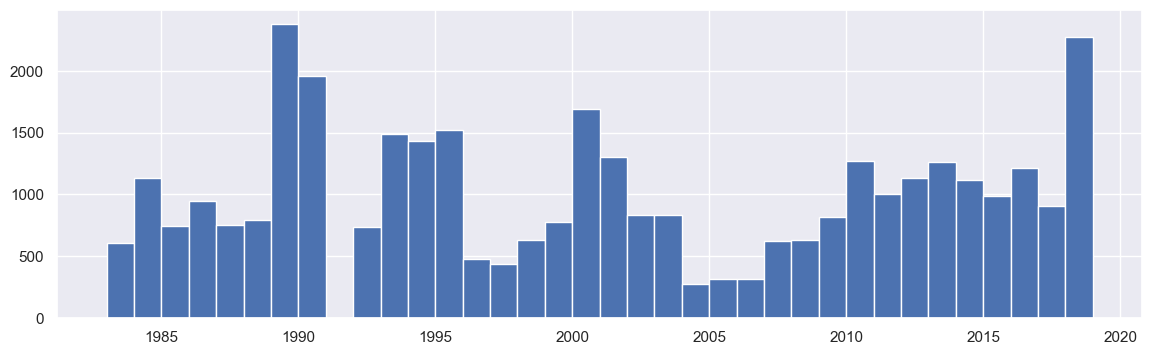

--------------------------------------------------
Histogram: MM


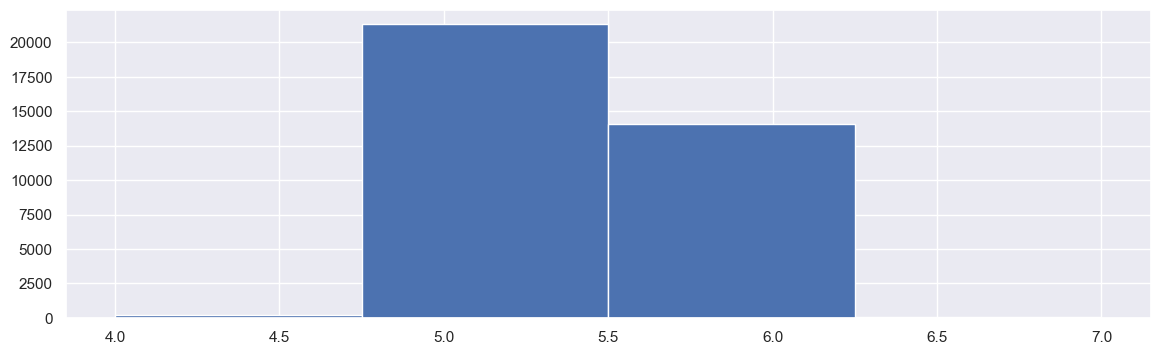

--------------------------------------------------
Histogram: DD


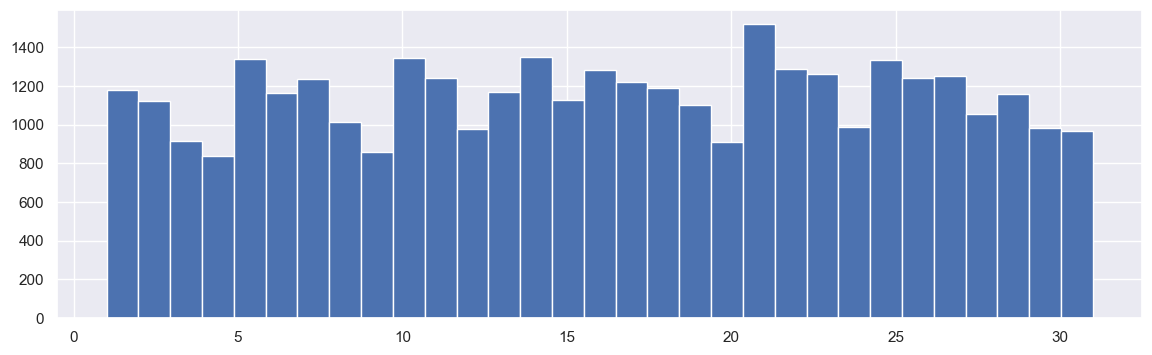

--------------------------------------------------
Histogram: WEEK


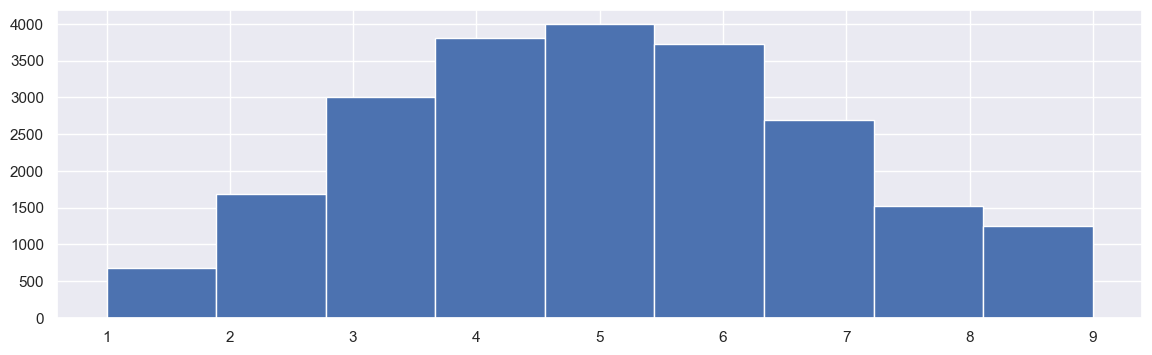

--------------------------------------------------
Histogram: PERIOD


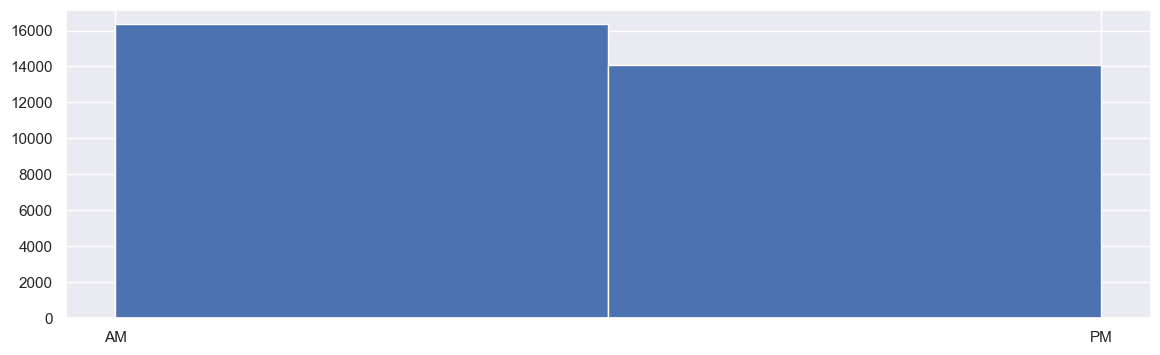

--------------------------------------------------
Histogram: CONDITION


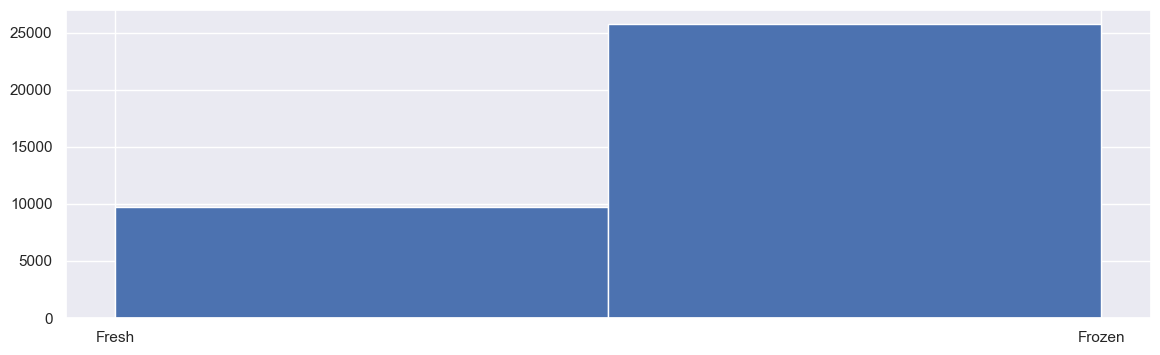

--------------------------------------------------
Histogram: FISH_NO


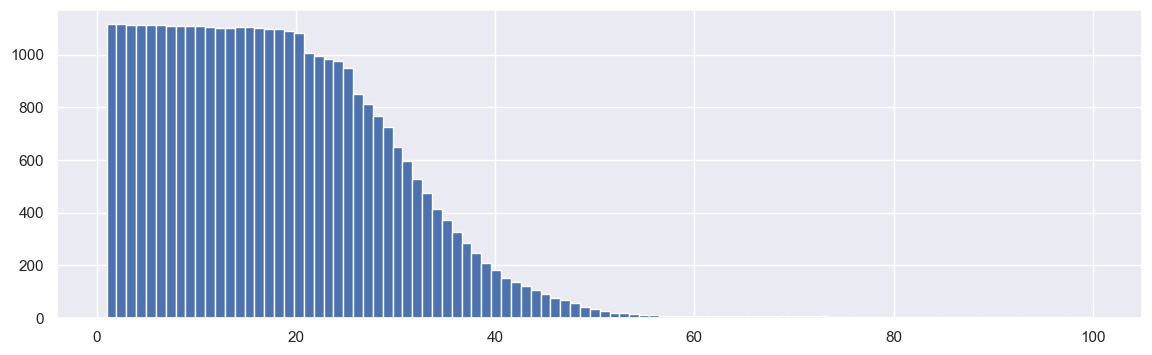

--------------------------------------------------
Histogram: FL_WET


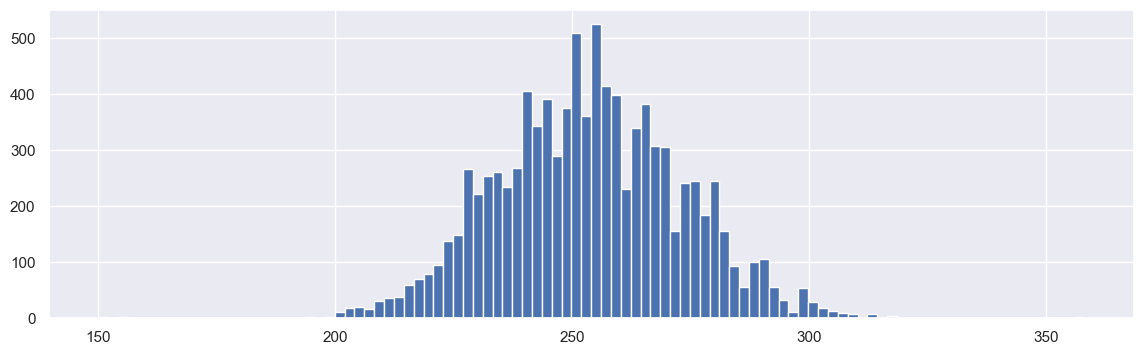

--------------------------------------------------
Histogram: FL_FROZEN


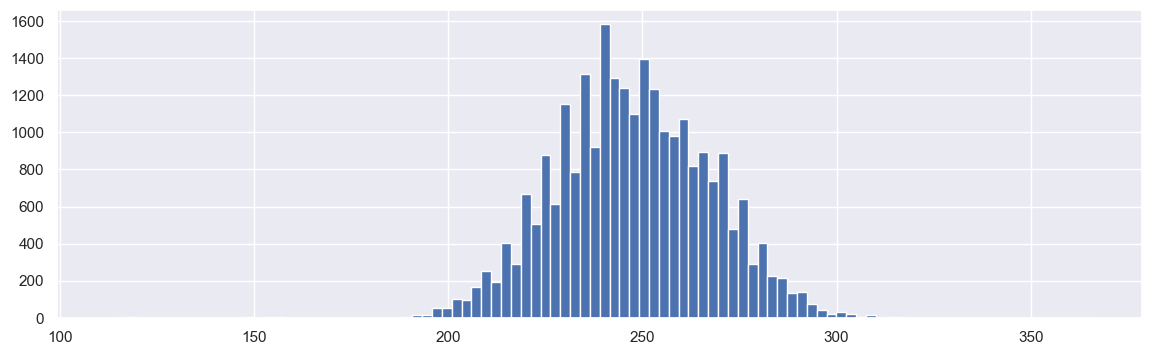

--------------------------------------------------
Histogram: FL_STD


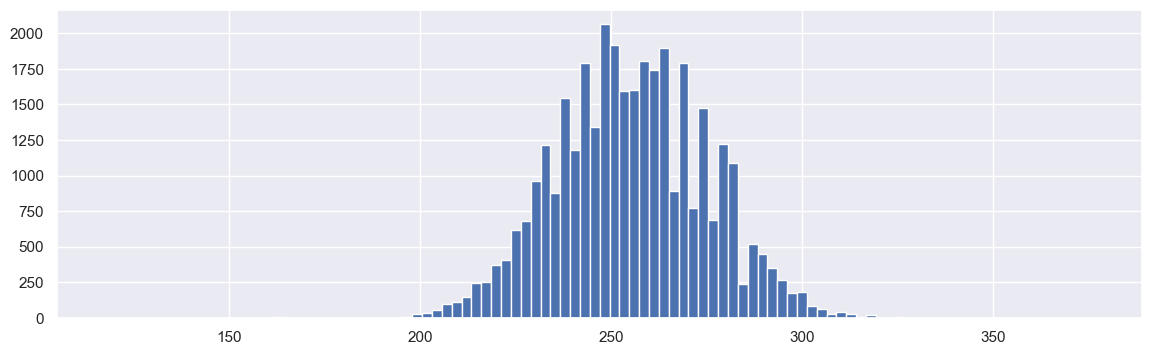

--------------------------------------------------
Histogram: WEIGHT


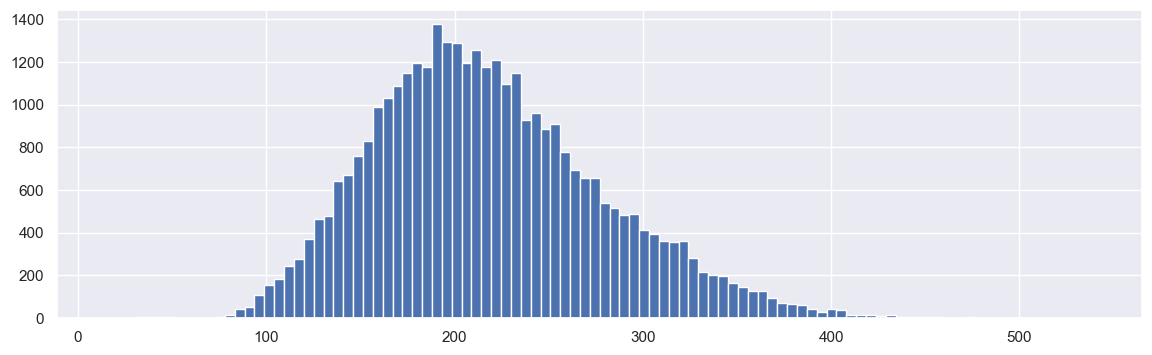

--------------------------------------------------
Histogram: SPECIES


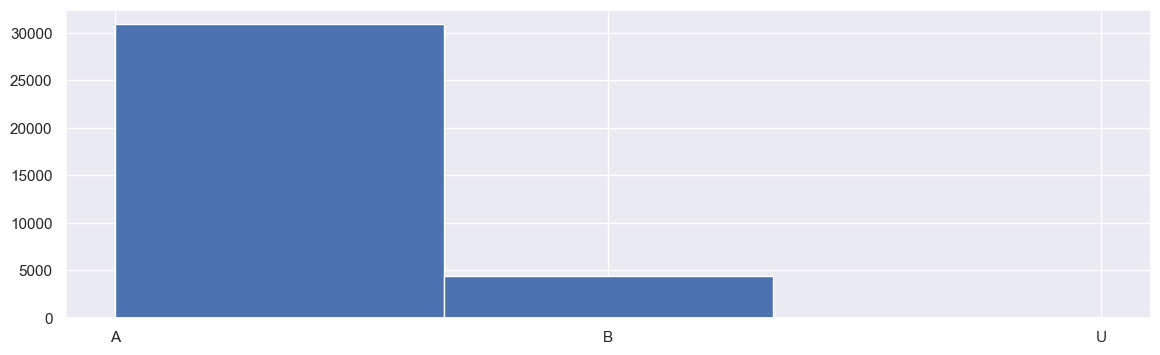

--------------------------------------------------
Histogram: SEX


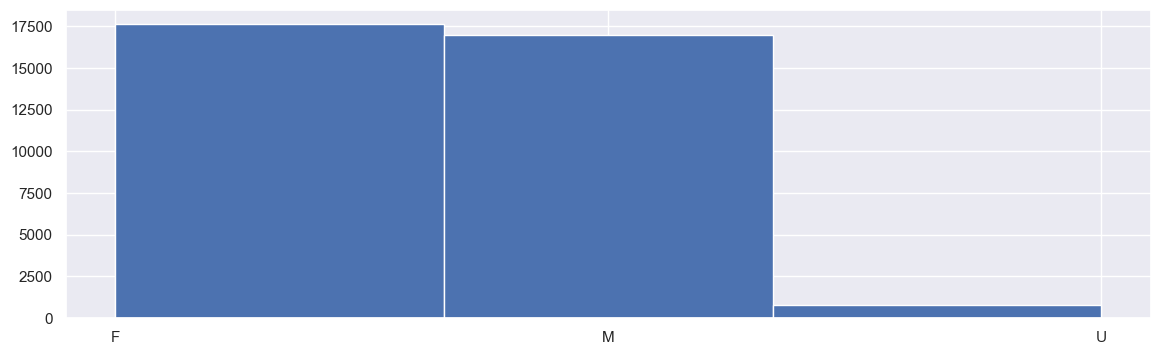

--------------------------------------------------
Histogram: MATURITY


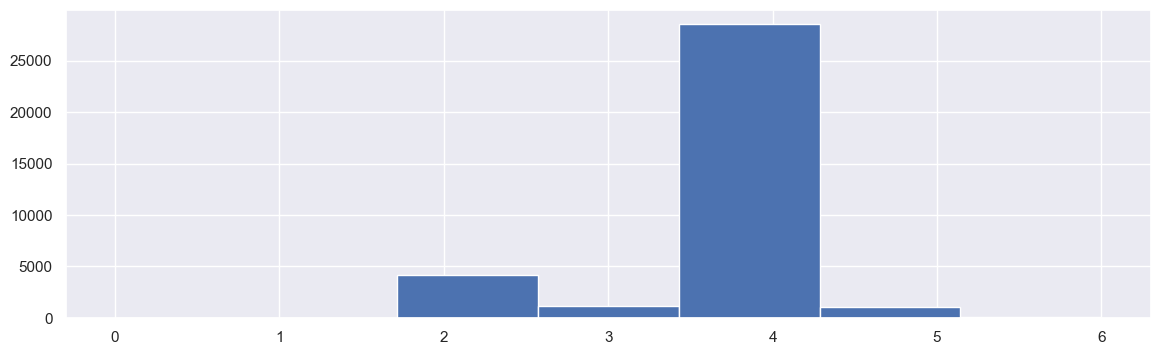

--------------------------------------------------
Histogram: GONAD_WEIGHT


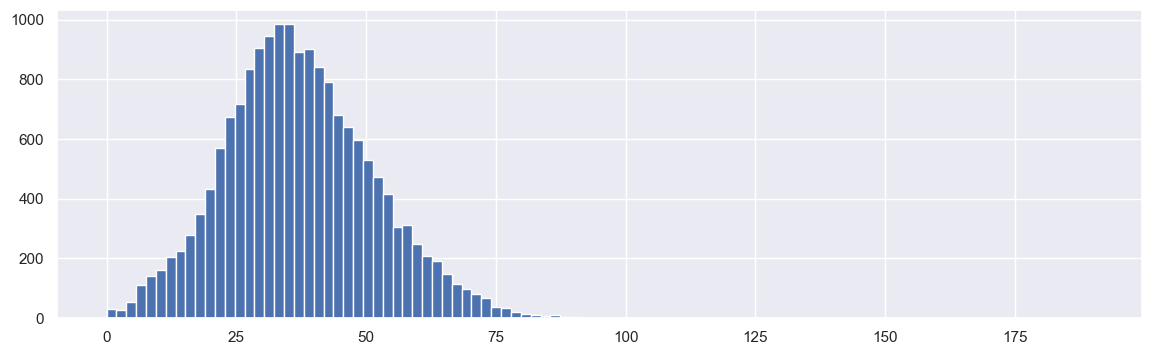

--------------------------------------------------
Histogram: 1ST PERSON AGING


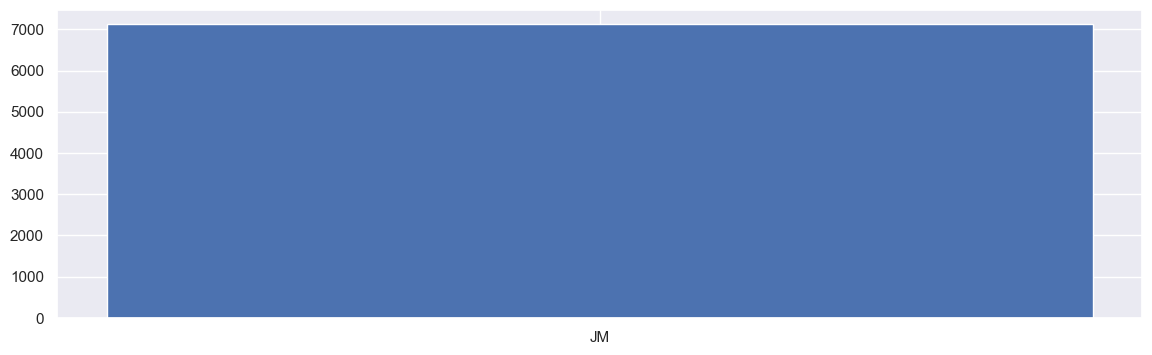

--------------------------------------------------
Histogram: AGE


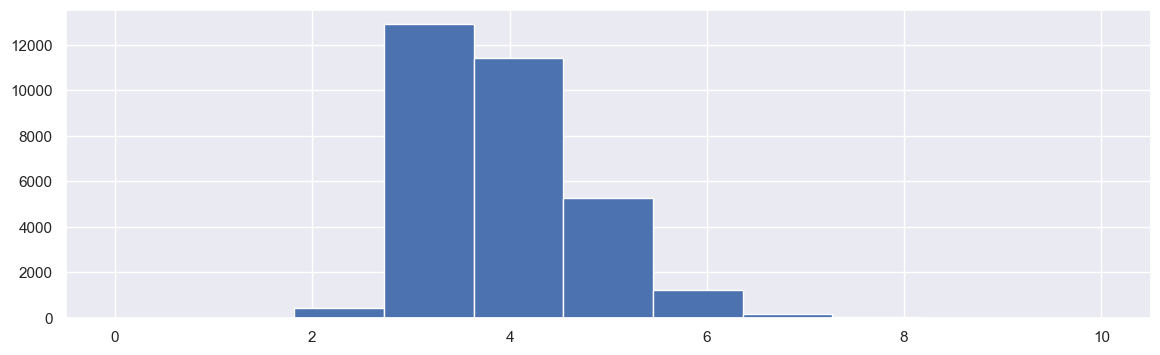

--------------------------------------------------
Histogram: FSP


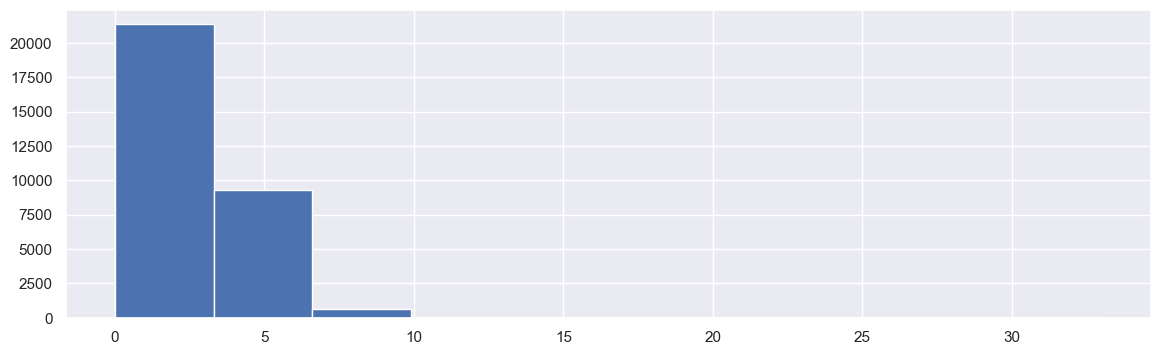

--------------------------------------------------
Histogram: 2ND PERSON AGING


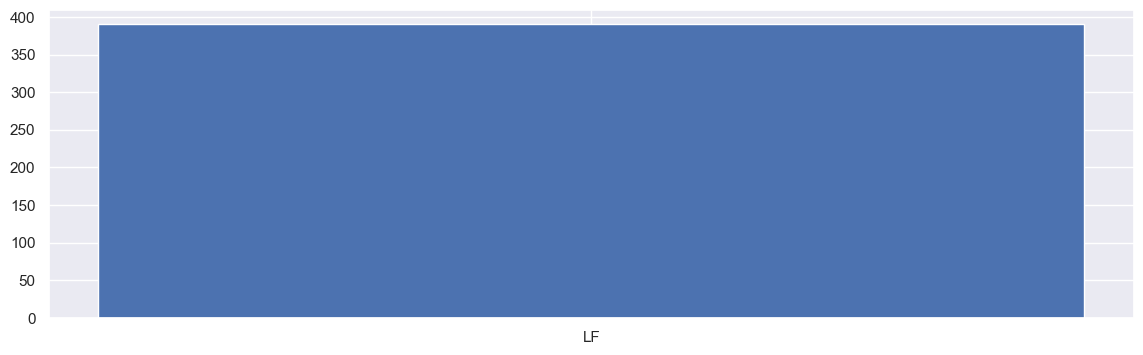

--------------------------------------------------
Histogram: AGE.1


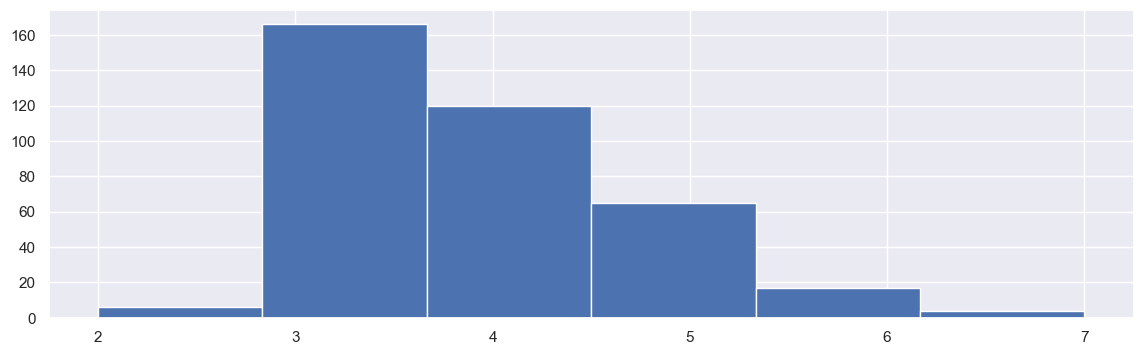

--------------------------------------------------
Histogram: FSP.1


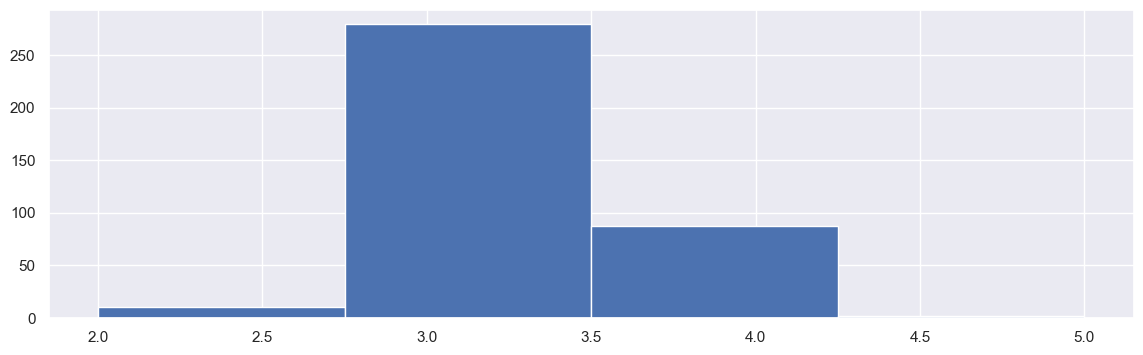

In [5]:
columns_to_print = ['YEAR', 'MM', 'DD', 'WEEK', 'PERIOD', 'CONDITION', 'FISH_NO',
       'FL_WET', 'FL_FROZEN', 'FL_STD', 'WEIGHT', 'SPECIES', 'SEX', 'MATURITY',
       'GONAD_WEIGHT', '1st Person Aging', 'AGE', 'FSP', '2nd Person Aging', 'AGE.1', 'FSP.1']

for column in columns_to_print:
    print('--------------------------------------------------\nHistogram:', column.upper())
    
    plt.figure(figsize=(14, 4))
    
    n_unique = df[column].nunique()
    
    max_bins = 100
    if n_unique <= max_bins:
        bins = n_unique
    else:
        bins = max_bins
    
    df[column].hist(bins=bins)
    
    plt.show()

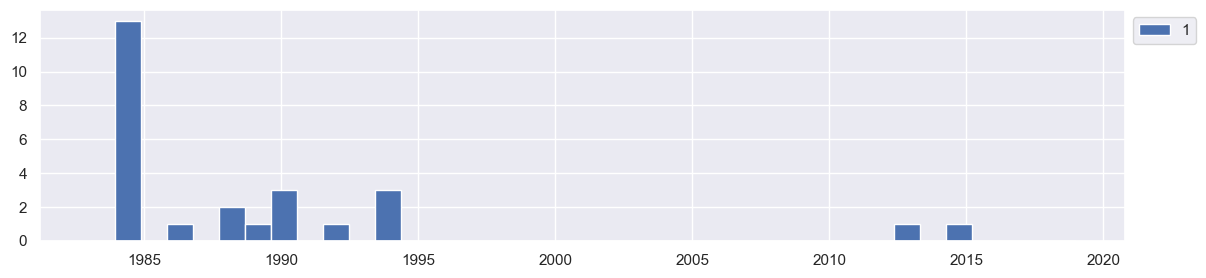

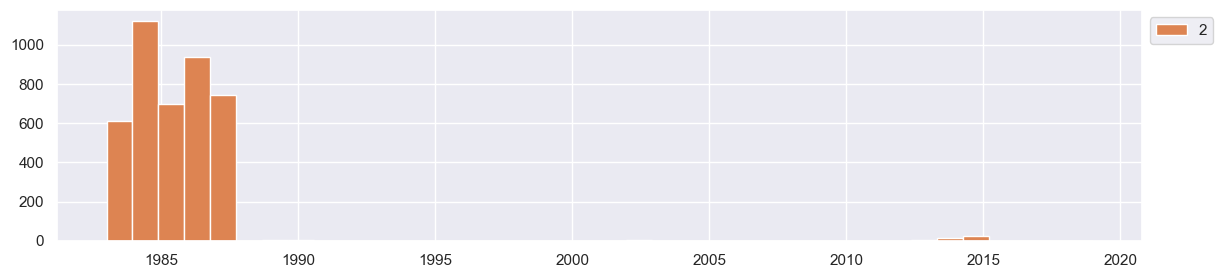

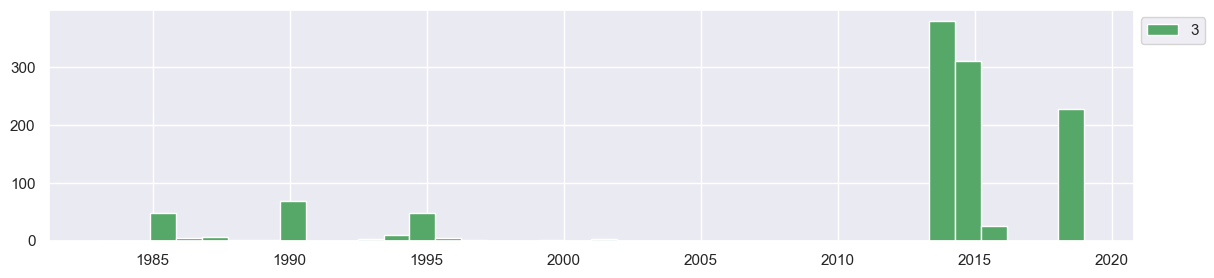

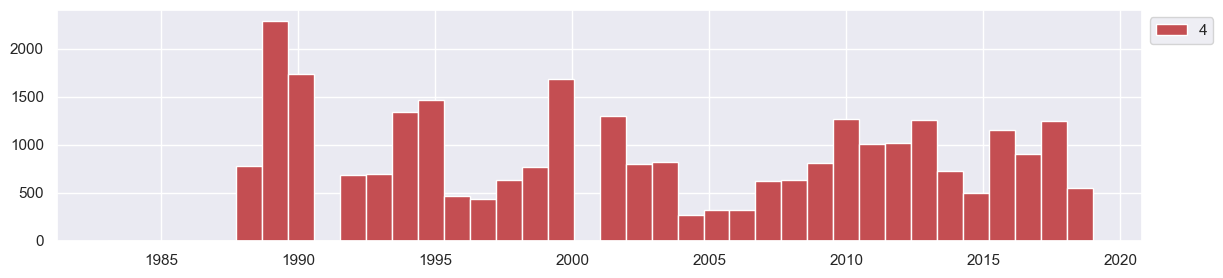

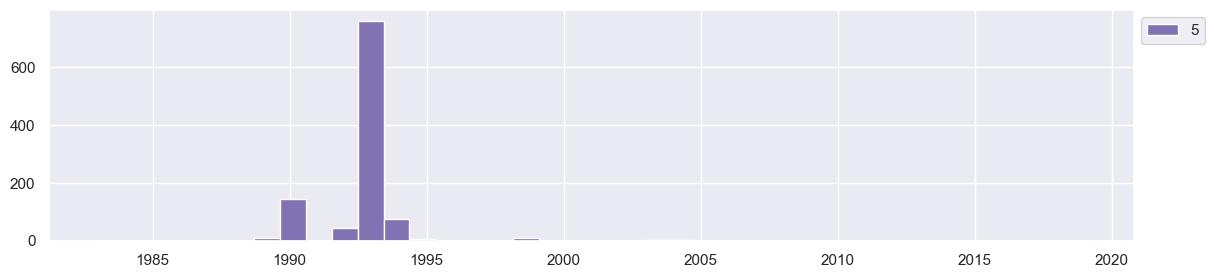

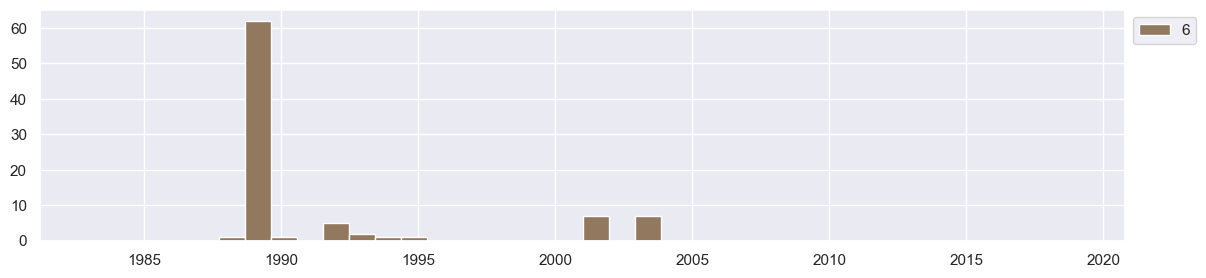

In [6]:
possible_maturity = [1, 2, 3, 4, 5, 6]

for i, maturity in enumerate(possible_maturity):

    plt.figure(figsize=(14, 3))
    xmin, xmax = 1983, 2019
    bins = 2019 - 1983 + 1
    bins_plot = [(x/(bins+1))*(xmax-xmin)+xmin for x in range(bins+2)] 

    df.loc[df.MATURITY == maturity, 'YEAR'].hist(bins=bins_plot, label=maturity, color=sns.color_palette()[i])
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

# Correlation

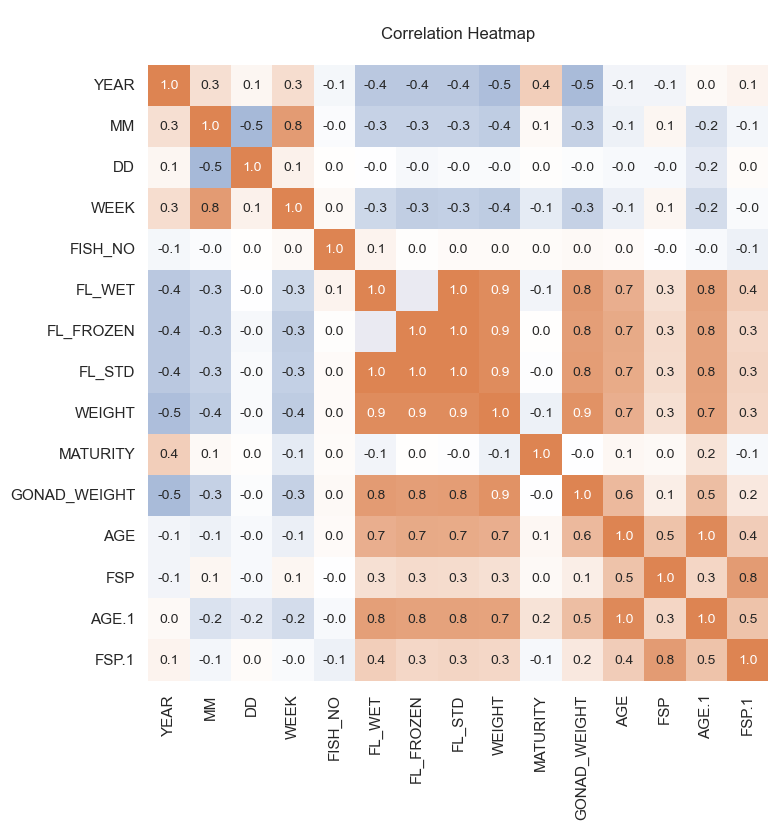

In [7]:
plt.figure(figsize=(8,8))
palette = sns.blend_palette([sns.color_palette()[0], '#ffffff', sns.color_palette()[1]], 3, as_cmap=True)
sns.heatmap(df.corr(), cmap=palette, annot=True, center=0, vmin=-1, vmax=1, fmt='.1f', annot_kws={"size": 10}, cbar=False)
plt.title('\nCorrelation Heatmap\n')
plt.show()

# Time Series


-------------------------------------------------------
CONDITION
CATEGORICAL


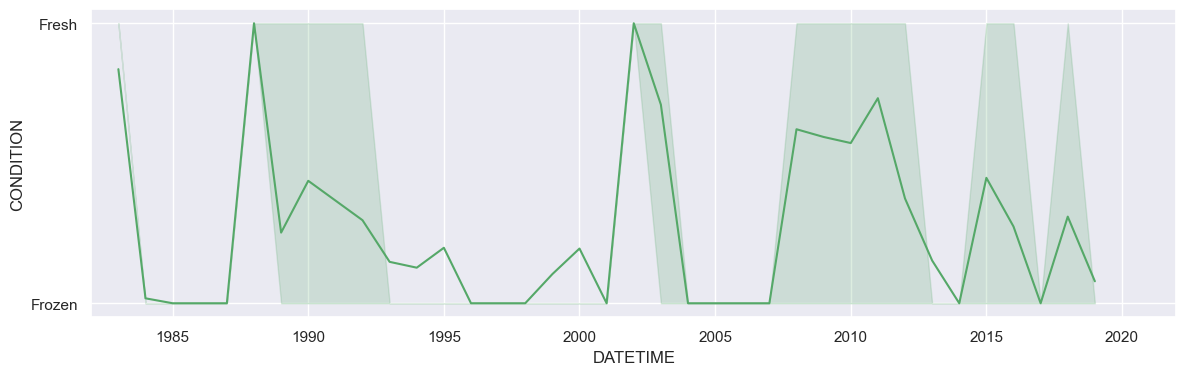


-------------------------------------------------------
FL_WET
INT


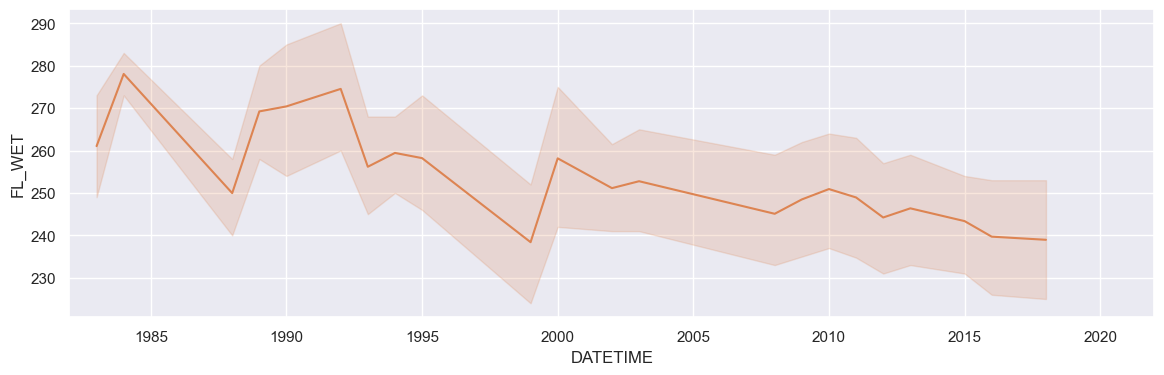


-------------------------------------------------------
FL_FROZEN
INT


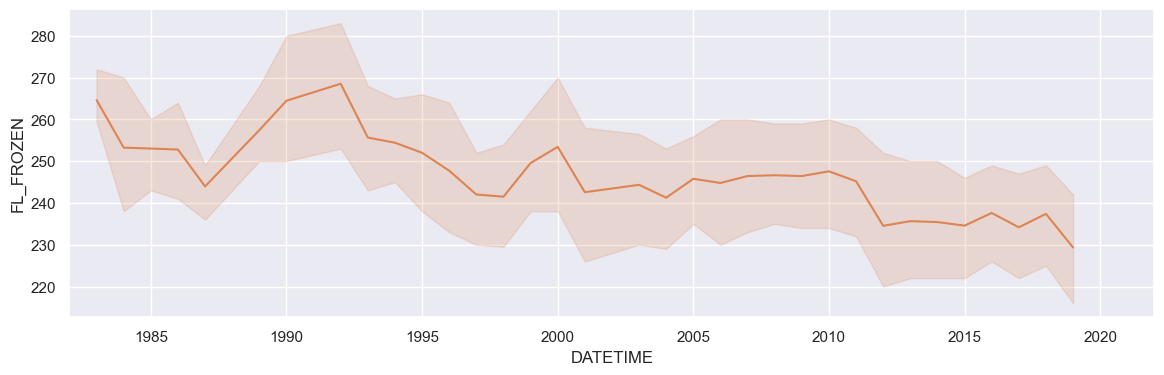


-------------------------------------------------------
FL_STD
FLOAT


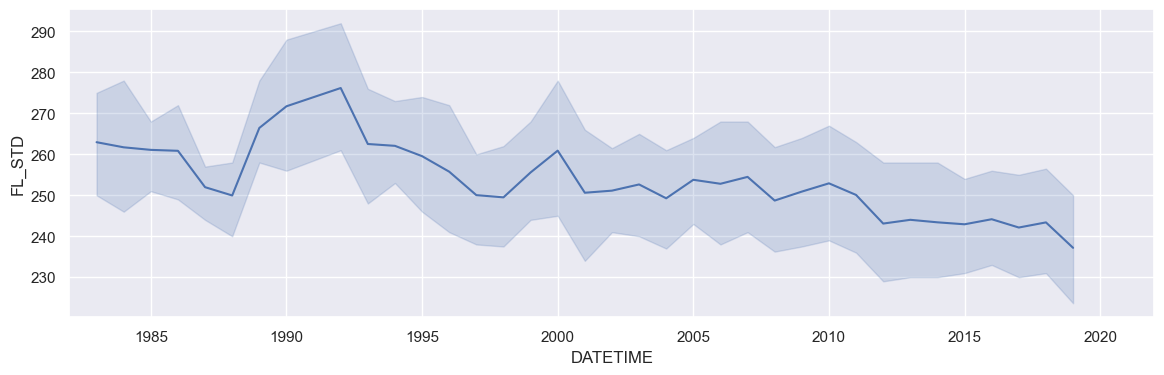


-------------------------------------------------------
WEIGHT
FLOAT


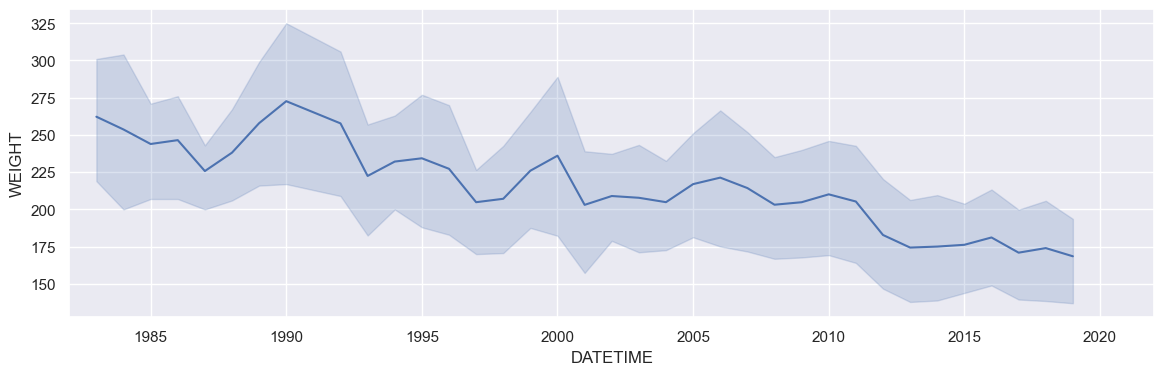


-------------------------------------------------------
SPECIES
CATEGORICAL


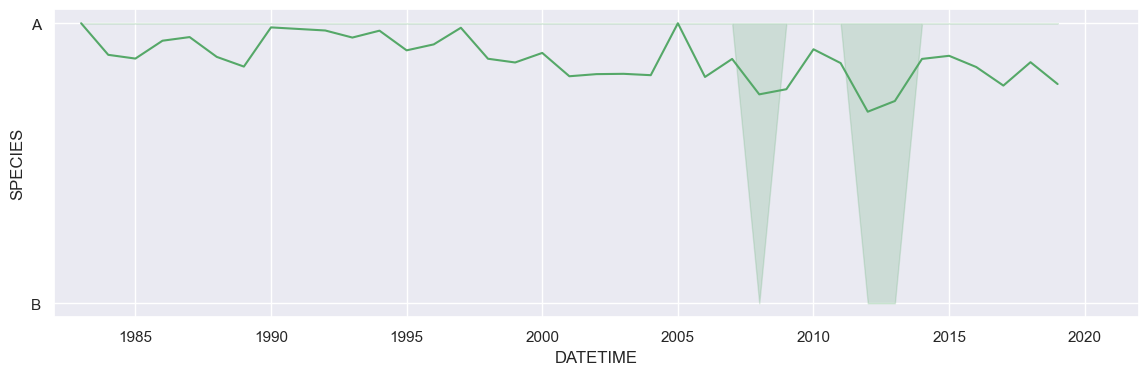


-------------------------------------------------------
SEX
CATEGORICAL


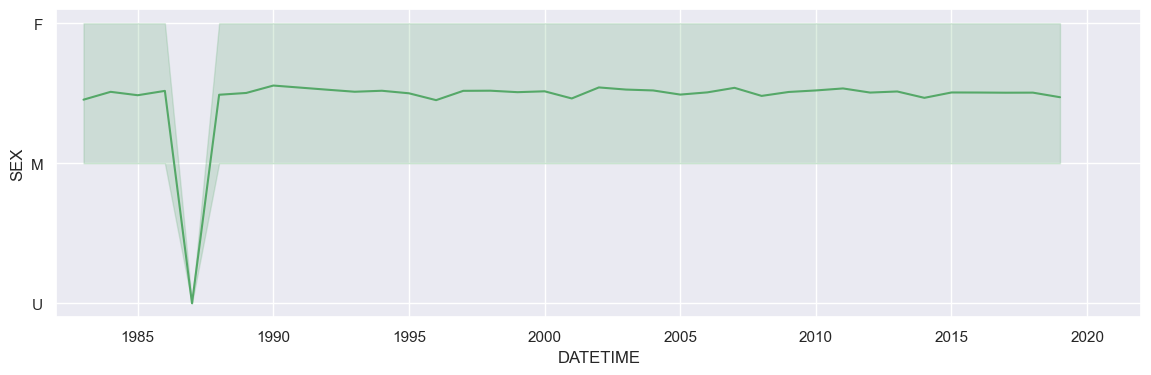


-------------------------------------------------------
MATURITY
INT


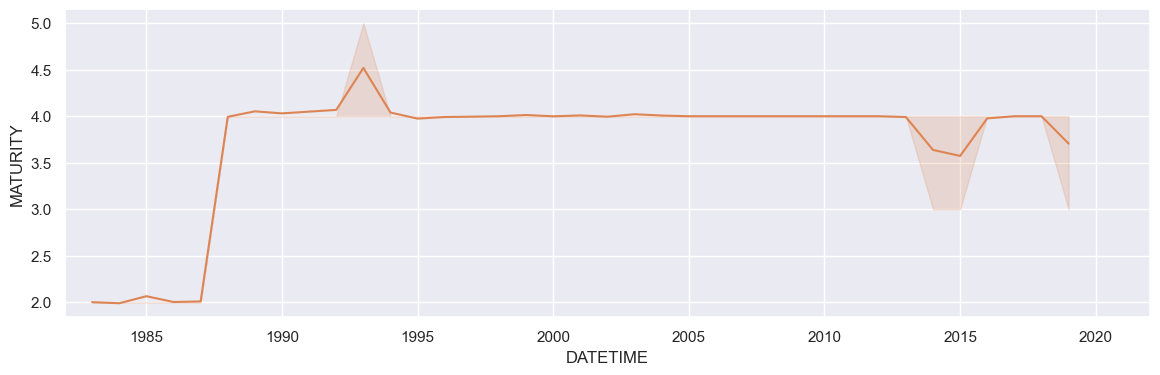


-------------------------------------------------------
GONAD_WEIGHT
FLOAT


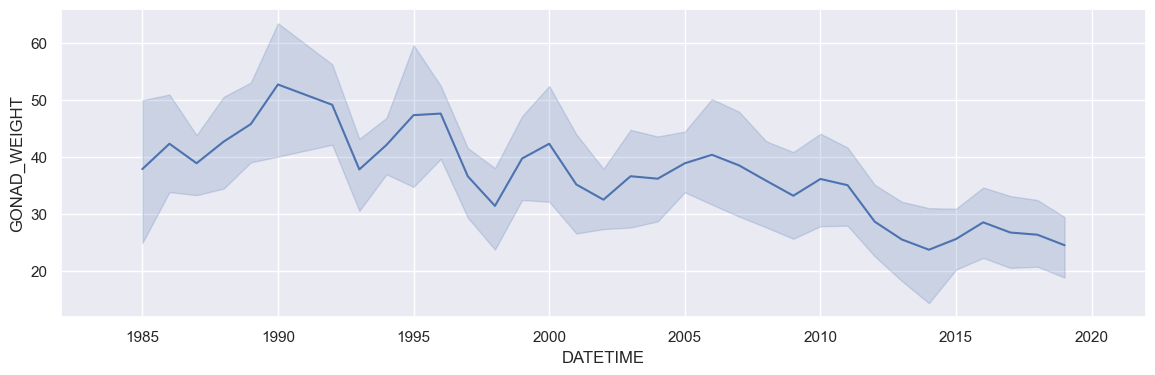


-------------------------------------------------------
AGE
INT


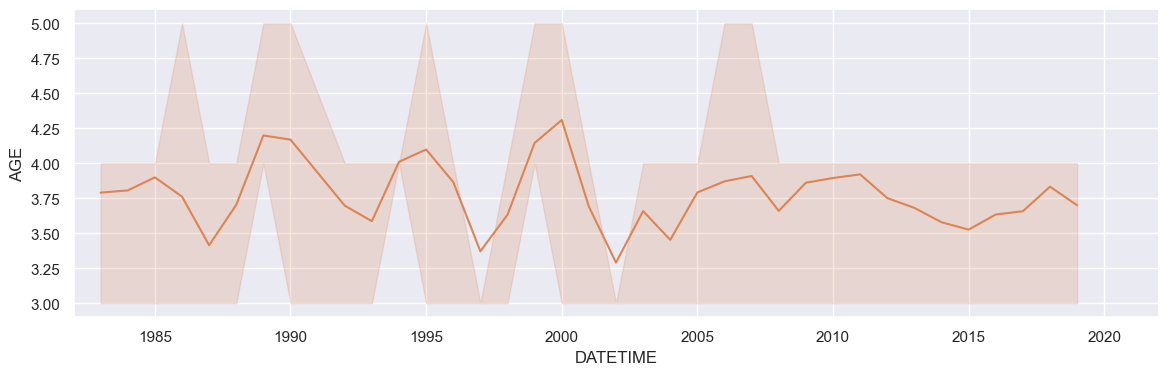


-------------------------------------------------------
FSP
INT


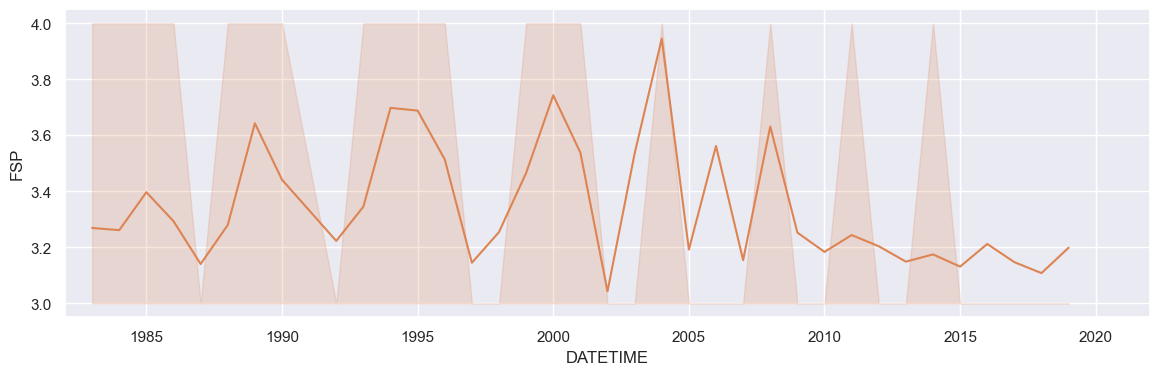


-------------------------------------------------------
AGE.1
INT


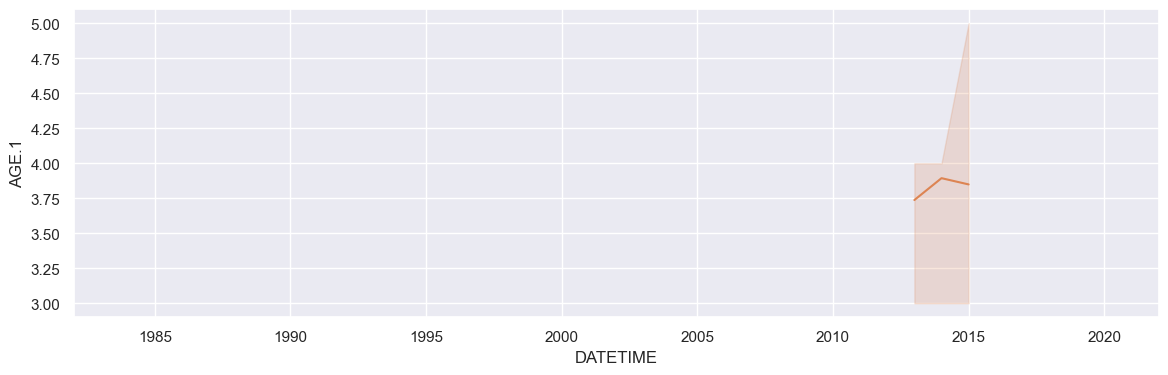


-------------------------------------------------------
FSP.1
INT


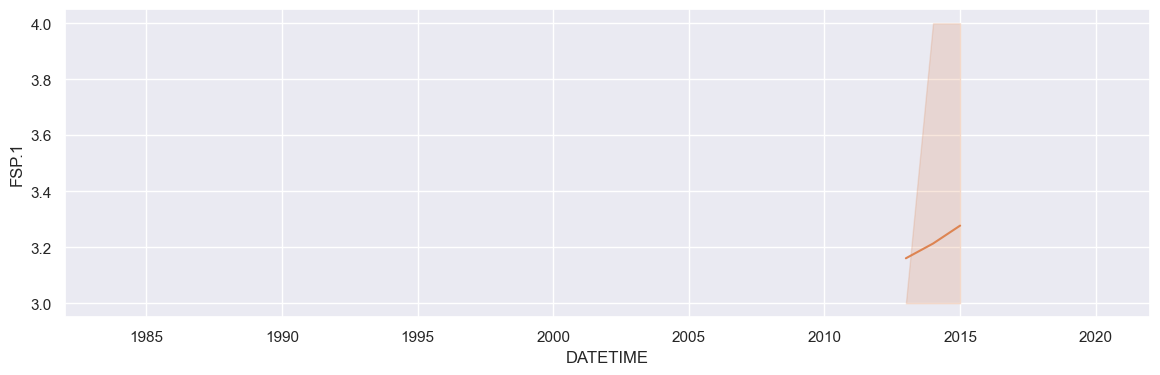

In [8]:
features = {
    'CONDITION': 'categorical',
    'FL_WET': 'integer', 
    'FL_FROZEN': 'integer',
    'FL_STD': 'float', 
    'WEIGHT': 'float', 
    'SPECIES': 'categorical', 
    'SEX': 'categorical', 
    'MATURITY': 'integer', 
    'GONAD_WEIGHT': 'float', 
    'AGE': 'integer', 
    'FSP': 'integer', 
    'AGE.1': 'integer', 
    'FSP.1': 'integer'
}

for feature in features:
    
    print('\n-------------------------------------------------------\n', feature.upper(), sep='')
    plt.figure(figsize=(14, 4))
    
    if features[feature] == 'float':
        plot = sns.lineplot(x=df.DATETIME.dt.year, y=df[feature], errorbar=('pi', 50), color=sns.color_palette()[0])
        print('FLOAT')
    elif features[feature] == 'integer':  # convert to float or get a ValueError
        plot = sns.lineplot(x=df.DATETIME.dt.year, y=df[feature].astype(float), errorbar=('pi', 50), color=sns.color_palette()[1])
        print('INT')
    elif features[feature] == 'categorical':
        plot = sns.lineplot(x=df.DATETIME.dt.year, y=df[feature], errorbar=('pi', 50), color=sns.color_palette()[2])
        print('CATEGORICAL')    
    
    # show entire dataset time period for all plots
    plot.set_xlim(1982, 2022)
    
    plt.show()